<a href="https://colab.research.google.com/github/David-invictus/TCC-Licenciatura/blob/Notebook-do-Colab/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TCC

##Importações!!!

###Bibliotecas!!!

In [4]:
#----------------- Importação necessária para compilar os dados ----------------

#--------- Importamos o Warnings para previnir alertas desnecessários. ---------
import warnings
warnings.filterwarnings("ignore")
#-------------------------------------------------------------------------------

#---------------- Introduce the basic package of data science. -----------------
#   Importamos a biblioteca Pandas para trabalhar com os dados
import pandas as pd
#   Importamos a biblioteca MatPlotLib ...
import matplotlib as mpl
#   Importamos a Stats da biblioteca SciPy ...
import scipy.stats as st
#   Importamos a biblioteca SeaBorn para desenhar melhor os gráficos
import seaborn as sns

# Import the required modules, numpy for calculation, and Matplotlib for drawing
#   Importamos a biblioteca NumPy
import numpy as np
#   Importamos o PyPlot da biblioteca MatPlotLib ...
import matplotlib.pyplot as plt
#-------------------------------------------------------------------------------

import statsmodels.api as sm

#- Introduce machine learning, preprocessing, model selection, and evaluation indicators. -
#   Importamos a biblioteca Scikit Learn (SkLearn)
import sklearn as sk
from sklearn.linear_model import LinearRegression
#   Importamos o pacote StandardScaler da biblioteca Preprocessing do SkLearn, para normalizar os dados.
from sklearn.preprocessing import StandardScaler
#   Importamos o pacote train_test_split da biblioteca model_select do SkLearn, para separar os dados de Treino e Test
from sklearn.model_selection import train_test_split
#   Importamos o pacote GridSearchCV da biblioteca Model_Selection do SkLearn
from sklearn.model_selection import GridSearchCV
#   Importamos o pacote R2_Score da biblioteca Metrics do SkLearn
from sklearn.metrics import r2_score
#-------------------------------------------------------------------------------

#---------------------------- Introduce algorithms. ----------------------------
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, ElasticNet
#-------------------------------------------------------------------------------

#------------ Compared with SVC, it is the regression form of SVM. -------------
from sklearn.svm import SVR
#-------------------------------------------------------------------------------

#---------------------------- Integrate algorithms. ----------------------------
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
#-------------------------------------------------------------------------------


#   Instanciamos um objeto e vamos chamar o Scaler
scaler = StandardScaler()

###Importando e testando os dados!!!

In [5]:
#uri = "/content/Dados_para_treinamento.csv"
#uri = "/content/drive/MyDrive/Graduação em Licenciatura da Computação - UFERSA (2018-2022)/Semestre 10 - 2022.2/10 - TCC/TCC/Dados_para_treinamento.csv"
uri = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt"

#df = pd.read_csv('file_location\filename.txt', delimiter = "\t")

dados = pd.read_csv(uri, delimiter = "\s+", header=54) 
dados.head()

,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
0,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
1,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
2,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
3,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
4,1958,8,1958.6219,314.93,316.18,-1,-9.99,-0.99


###Outras importações

In [6]:
#----------------- Importação secundárias para testar os dados -----------------

#   Importamos o pacote Accuracy_Score da biblioteca Metrics do SkLearn, para ver a acurácia do modelo.
from sklearn.metrics import accuracy_score
#   Importamos o pacote MLPClassifier da biblioteca Neural_Network do SkLearn
from sklearn.neural_network import MLPClassifier

#   Importamos o pacote LinearSVC da biblioteca svm do SkLearn, para gerar um Cérebro vázio.
#from sklearn.svm import LinearSVC
#   Importamos a biblioteca DataSet do SkLearn
#from sklearn import datasets

#   Instanciamos um objeto e vamos chamar o LinearSVC
#modelo = LinearSVC()

#from pandas.core.arrays.sparse import array

#Testes com os dados do TCC

##Começando a implementar...

###Modificando os dados!!!

In [ ]:
dados.columns

Index(['1958', '3', '1958.2027', '315.70', '314.43', '-1', '-9.99', '-0.99'], dtype='object')

In [ ]:
dados.columns = ['Ano', 'Mês', 'Dados decimais','Média mês','Dados ajustados','Dias','Desvio padrão-Dados','Dados incertos' ]

In [ ]:
dadosT = dados
dadosT.head(1)

,Ano,Mês,Dados decimais,Média mês,Dados ajustados,Dias,Desvio padrão-Dados,Dados incertos
0,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99


###Outras modificações teste

In [ ]:
#renomear = {
#    ' year' : 'Ano',
#    ' month' : 'Mês',
#    ' decimal date' : 'Dados decimais',
#    ' monthly average' : 'Média mês',
#    ' de-season alized' : 'Dados ajustados',
#    ' days' : 'Dias',
#    ' st.dev of days' : 'Desvio padrão-Dados',
#    ' unc. of mon mean' : 'Dados incertos'
#}
#dadosT = dados.rename(columns = renomear)
#dadosT = dados
#dadosT.head(1)

In [ ]:
#dadosT[['Ano', 'Mês', 'Dados decimais', 'Média mês', 'Dados ajustados']]

In [ ]:
#dadosC1 = dadosT[['Ano', 'Mês', 'Dados decimais', 'Média mês']]
#dadosC1.head(1)

#dadosC = dadosT[['Ano', 'Mês', 'Dados decimais']]
#dadosC.head(1)

In [ ]:
#DAjust1 = dadosT['Dados ajustados']
#DAjust1.head(1)

#DAjust = dadosT['Média mês']
#DAjust.head(1)

###Começando a trabalhar com os dados!

####Trabalhando as característica 'X' e 'Y'!!!

In [ ]:
print('A base de dados contém {} registros \n'.format(dadosT.shape[0]))
print('Registros não nulos')
dadosT.count()

A base de dados contém 775 registros 

Registros não nulos


Ano                    775
Mês                    775
Dados decimais         775
Média mês              775
Dados ajustados        775
Dias                   775
Desvio padrão-Dados    775
Dados incertos         775
dtype: int64

In [ ]:
#   'x' características e 'y' etiqueta.
x = dadosT['Dados decimais']
y = dadosT['Média mês']
caput = dadosT.head(0)
#caput = dadosT[:0]
#caput = dadosT.columns

#x.head(1)
#y.head(1)
#caput

In [ ]:
#   Exibir atributos relacionados.
print('Nome da coluna de características')
print(caput)
#print("Amostra de volume de dados: %d, número de características: %d"% x.shape)
print("Volume de dados das amostras de destino: %d"% y.shape[0])

Nome da coluna de características
Empty DataFrame
Columns: [Ano, Mês, Dados decimais, Média mês, Dados ajustados, Dias, Desvio padrão-Dados, Dados incertos]
Index: []
Volume de dados das amostras de destino: 775


####Trabalhando com SeaBorn

In [ ]:
#--------------------- Remanejar para área de importações ----------------------
#   Importamos a biblioteca SeaBorn para desenhar melhor os gráficos
import seaborn as sns
from seaborn.relational import scatterplot
#-------------------------------------------------------------------------------

#indCO2 = sns.scatterplot(x='Dados decimais', y='Média mês', data=dadosT, palette= 'green')
#co2Ano = sns.scatterplot(x= 'Ano', y= 'Média mês', data = dadosT)

In [ ]:
#indCO2_2 = sns.relplot(x= 'Dados decimais', y= 'Média mês', data= dadosT, palette= 'green', kind= 'line')
#co2Ano_2 = sns.relplot(x= 'Ano', y= 'Média mês', data = dadosT, palette= 'red', kind= 'line')

In [ ]:
#--------------------- Remanejar para área de importações ----------------------
#   Importamos a Stats da biblioteca SciPy ...
import scipy.stats as st
#-------------------------------------------------------------------------------

#sns.distplot(tuple(y), kde=False, fit=st.norm)

###Pré-processamento!!!

In [ ]:
#--------------------- Remanejar para área de importações ----------------------
#   Importamos o pacote train_test_split da biblioteca model_select do SkLearn, para separar os dados de Treino e Test
#from sklearn.model_selection import train_test_split
#-------------------------------------------------------------------------------

#   segmentamos os dados
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.2, random_state=28)
#treino_x
#treino_x.shape
#treino_y
#treino_y.shape
#teste_x
#teste_x.shape
#teste_y
#teste_y.shape
print('Os dados de treino em X tem:', treino_x.shape,
      '\nOs dados de treino em Y tem:', treino_y.shape,
      '\nOs dados de teste em X tem:', teste_x.shape,
      '\nOs dados de teste em Y tem:', teste_y.shape)

Os dados de treino em X tem: (9,) 
Os dados de treino em Y tem: (9,) 
Os dados de teste em X tem: (3,) 
Os dados de teste em Y tem: (3,)


In [ ]:
#--------------------- Remanejar para área de importações ----------------------
#   Importamos o pacote StandardScaler da biblioteca Preprocessing do SkLearn, para normalizar os dados.
#from sklearn.preprocessing import StandardScaler

#   Instanciamos um objeto da classe Scaler
#scaler = StandardScaler()
#-------------------------------------------------------------------------------

treino_x = treino_x.reshape((-1, 1))
teste_x = teste_x.reshape((-1, 1))

#   Padronizamos os dados
treino_x = scaler.fit_transform(treino_x)
teste_x = scaler.fit_transform(teste_x)

#treino_x = scaler.fit_transform(treino_x.array.reshape((-1, 1)))
#print(treino_x[:5])
#teste_x = scaler.fit_transform(teste_x.array.reshape((-1, 1)))
#teste_x[:5]

###Usando vários modelos de Regressão para modelar os Data Sets!!!

In [ ]:
#--------------------- Remanejar para área de importações ----------------------
#Introduce algorithms.
#from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, ElasticNet

#Compared with SVC, it is the regression form of SVM.
#from sklearn.svm import SVR

#Integrate algorithms.
#from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from xgboost import XGBRegressor
#-------------------------------------------------------------------------------

#   Configurar o nome do modelo.
names = ['LinerRegression',
  'Ridge',
  'Lasso',
  'Random Forrest',
  'GBDT',
  'Support Vector Regression',
  'ElasticNet',
  'XgBoost']

#   Definir o modelo.
#   cv é o cross-validation (Validação cruzada).
models = [LinearRegression(),
  RidgeCV(alphas=(0.001,0.1,1),cv=3),
  LassoCV(alphas=(0.001,0.1,1),cv=5),
  RandomForestRegressor(n_estimators=10),
  GradientBoostingRegressor(n_estimators=30),
  SVR(),
  ElasticNet(alpha=0.001,max_iter=10000),
  XGBRegressor()]

In [ ]:
#--------------------- Remanejar para área de importações ----------------------
#Introduce machine learning, preprocessing, model selection, and evaluation indicators.
#from sklearn.metrics import r2_score
#-------------------------------------------------------------------------------

#   Retorna ass pontuações em R2 de todos os modelos de regressão.
#   Define a função de pontuação R2.
def R2(model, treino_x, teste_x, treino_y, teste_y):
  model_fitted = model.fit(treino_x, treino_y)
  y_pred = model_fitted.predict(teste_x)
  score = r2_score(teste_y, y_pred)
  return score
  
#   Percorre todos os modelos para pontuar.
for name, model in zip(names, models):
  score = R2(model, treino_x, teste_x, treino_y, teste_y)
  print("{}: {:.6f}".format(name, score.mean()))

LinerRegression: 0.309279
Ridge: 0.304119
Lasso: 0.307377
Random Forrest: 0.306168
GBDT: 0.186552
Support Vector Regression: -0.304596
ElasticNet: 0.309037
[22:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XgBoost: 0.204661


###Ajustando os Hiperparâmetros com Grid Search!

####Construindo o modelo!!!

In [ ]:
#--------------------- Remanejar para área de importações ----------------------
#Introduce machine learning, preprocessing, model selection, and evaluation indicators.
#from sklearn.model_selection import GridSearchCV
#-------------------------------------------------------------------------------
#treino_x = treino_x.array.reshape((-1, 1))
'''
  'kernel': kernel function
  'C': SVR regularization factor
  'gamma': 'rbf', 'poly' and 'sigmoid' kernel function coefficient, which affects the model performance
'''
parameters = {
  'kernel': ['linear', 'rbf'],
  'C': [0.1, 0.5,0.9,1,5],
  'gamma': [0.001,0.01,0.1,1]
}

#Use grid search and perform cross validation.
model = GridSearchCV(SVR(), param_grid=parameters, cv=3)
model.fit(treino_x, treino_y)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 0.9, 1, 5],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

####Obtendo os parâmetros ideais!!!

In [ ]:
print("Listar parâmetros ideais:", model.best_params_)
print("Modelo ideal:", model.best_estimator_)
print("Valor R2 ideal:", model.best_score_)

Listar parâmetros ideais: {'C': 5, 'gamma': 0.001, 'kernel': 'linear'}
Modelo ideal: SVR(C=5, gamma=0.001, kernel='linear')
Valor R2 ideal: 0.9560744727895102


####Visualizar dados

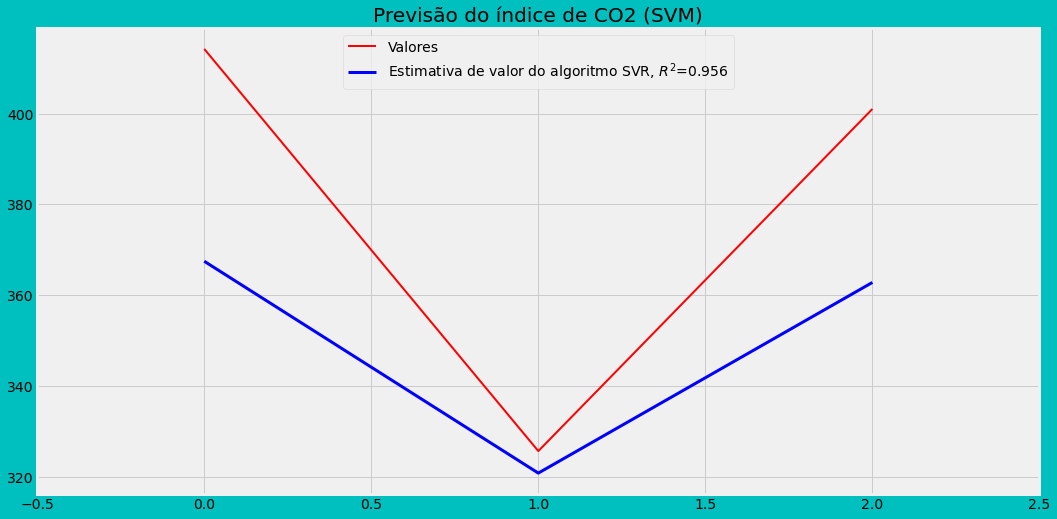

In [ ]:
#--------------------- Remanejar para área de importações ----------------------
#Introduce the basic package of data science.
#import matplotlib.pyplot as plt
#-------------------------------------------------------------------------------

##visualização dos dados.
ln_x_test = range(len(teste_x))
y_predict = model.predict(teste_x)

#Configurar o canvas.
plt.figure(figsize=(16,8), facecolor='c', edgecolor='r')

#Desenhar com uma linha vermelha.
plt.plot (ln_x_test, teste_y, 'r-', lw=2, label=u'Valores')

#Desenhar com uma linha azul.
plt.plot (ln_x_test, y_predict, 'b', lw = 3, label=u'Estimativa de valor do algoritmo SVR, $R^2$=%.3f' %
(model.best_score_))

#Configurar o diagrama.
plt.legend(loc ='upper center')
plt.grid(True)
plt.title(u"Previsão do índice de CO2 (SVM)")
plt.xlim(-0.5, 2.5)
plt.show()

#Testes com dados de validação do experimento!!!?

##Detalhe da Regressão Linear!!!

###Preparação de dados!!!

Text(0.5, 1.0, 'Figure 1 - Scatter Plot')

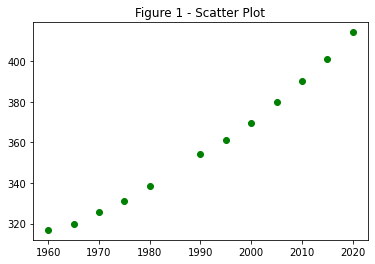

In [195]:
#--------------------- Remanejar para área de importações ----------------------
#Import the required modules, numpy for calculation, and Matplotlib for drawing
#import numpy as np
#import matplotlib.pyplot as plt
#-------------------------------------------------------------------------------

# Definir dados,e modificar a lista para array
xe = [1960, 1965, 1970, 1975, 1980, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
xe = np.array(xe)

ye = [316.9100, 320.0358, 325.6817, 331.1158, 338.7625, 354.4533, 360.9683, 369.7075, 379.9833, 390.1017, 401.0125, 414.2383]
ye = np.array(ye)

#Mostar o efeito de um scatter plot
plt.scatter(xe, ye, c='g')
plt.title(u"Figure 1 - Scatter Plot")

###Definir funções relacionadas!!!

Função modelo: Definição do modelo de Regreção Linear 'wx+b'.

Função perda: Função perda de erro quadrático médio.

Função de otimização: Método de Gradiente descendente encontra derivadas parciais de 'w' e 'b'.

In [196]:
#O modelo básico de Regressão linear é 'wx+ b', e como este é um espaço bidimensional, o modelo é 'ax+ b'
def model(a, b, x):
  return a * x + b

#The most commonly used loss function of linear regression model is the loss function of mean variance difference
def loss_function(a, b, x, y):
  num = len(xe)
  prediction = model(a, b, x)
  return (0.5/num) * (np.square(prediction - ye)).sum()

#The optimization function mainly USES partial derivatives to update two parameters a and b
def optimize(a, b, x, y):
  num = len(xe)
  prediction = model(a, b, x)
  
  #Update the values of A and B by finding the partial derivatives of the loss function on a and b
  da = (1.0/num) * ((prediction - ye) * xe).sum()
  db = (1.0/num) * ((prediction - ye).sum())
  a = a - Lre * da
  b = b - Lre * db
  return a, b

#Função de iteração, retorna 'a' e 'b'.
def iterate(a, b, x, y, times):
  for i in range(times):
    a, b = optimize(ae, be, xe, ye)
  return a, b

###Iniciando a iteração!!!

Modelo de inicialização e otimização iterativa

Valor gerado de 'a': 1.6221383333333326
Valor gerado de 'b': -2862.481133333332
Parâmetro/Valor em 'Lr' passado 1e-08



Text(0.5, 1.0, 'Figure 2 - 1.000 iterações')

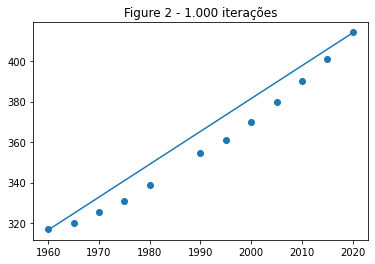

In [197]:
#Inicializando os parametetros e exibindo-os
ne = len(xe)
#a = np.random.rand(1)
#b = np.random.rand(1)
ae = (ye[ne-1] - ye[0]) / (xe[ne-1] - xe[0])
be = (ye[0] * xe[ne-1] - ye[ne-1] * xe[0]) / (xe[ne-1] - xe[0])
print("Valor gerado de 'a':", ae)
print("Valor gerado de 'b':", be)
Lre = 1e-8
print("Parâmetro/Valor em 'Lr' passado", Lre)

#Para a primeira interação, os valores de parâmetro, perdas e visualização depois da iteração são exibidos.
ae, be = iterate(ae, be, xe, ye, 1000)
prediction = model(ae, be, xe)
loss = loss_function(ae, be, xe, ye)
#print("\nNovo valor de 'a':", ae, "\nNovo valor de 'b':", be, "\nNovo valor da Perda:", loss)
print()

plt.scatter(xe, ye)
plt.plot(xe, prediction)
plt.title(u"Figure 2 - 1.000 iterações")

###Alterando dados!!!

Implementando função para imprimir as iterações...

In [198]:
ni = 2
def imprirIterações(ae, be, xe, ye, ni):
  ae, be = iterate(ae, be, xe, ye, ni)
  prediction = model(ae, be, xe)
  loss = loss_function(ae, be, xe, ye)
  print("Novo valor de 'a':", ae, "\nNovo valor de 'b':", be, "\nNovo valor da Perda:", loss)
  print()

  plt.scatter(xe, ye)
  plt.plot(xe, prediction)
  plt.title(u"Figure 2 - {} iterações".format(ni))

  #return imprirIterações

#imprirIterações(a, b, x, y, n)

Implementando função para manipular e imprimir a inicialização de parâmetros

In [199]:
w = 1
k = 1
j = 1e-4

def iniPar(w, k, j):
  a = np.random.rand(w)
  print("Valor gerado de 'a':", ae)
  b = np.random.rand(k)
  print("Valor gerado de 'b':", be)
  Lr = j
  print("Parâmetro/Valor em 'Lr' passado", Lre)
  print()

#iniPar(w, k, j)

Valor gerado de 'a': 1.6219856438653117
Valor gerado de 'b': -2862.481133410023
Parâmetro/Valor em 'Lr' passado 1e-08

Novo valor de 'a': 1.6218390041623074 
Novo valor de 'b': -2862.4811334836754 
Novo valor da Perda: 33.68313383313909



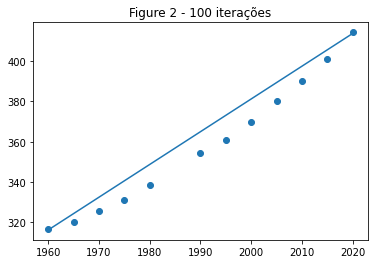

In [200]:
iniPar(w, k, 1e-3)
imprirIterações(ae, be, xe, ye, 100)

##Fazendo via SK LEARN!!!

In [ ]:
#import sklearn as sk
#from sklearn.linear_model import LinearRegression

In [201]:
modelSk = LinearRegression() 
x_e = xe.reshape((-1, 1))
modelSk.fit(x_e,ye)

LinearRegression()

In [202]:
# Os Coeficientes
Ae = modelSk.coef_
Be = modelSk.intercept_
print("Coeficientes: \n", Ae, Be)

# Erro quadrático médio
r_2e = modelSk.score(x_e, ye)
print('Coeficientes de determinação:', r_2e)

Coeficientes: 
 [1.61114311] -2848.2652143712567
Coeficientes de determinação: 0.9826340048272604


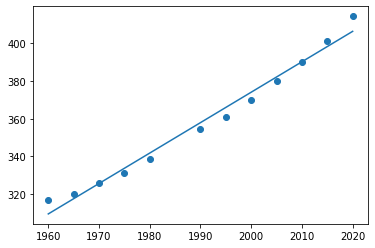

In [203]:
# Saídas plotadas
plt.scatter(xe, ye)
plt.plot(xe, modelSk.predict(x_e))

plt.show()

###Treino a IA

In [ ]:
#modelo.fit(x_, y)
#y_ = y.reshape((-1, 1))
#previsoes = model.predict(x_)
#accuracy_score(y_, previsoes) * 100

##Trabalhando com o Método dos Mínimos Quadrados Linear [MMQ]!

Retorne a solução de mínimos quadrados para uma equação de matriz linear.

np.linalg.lstsq(a, b[, rcond])

Resolver uma equação de matriz linear ou sistema de equações escalares lineares.

np.linalg.solve(a, b)

###Breve explicação dos modelos e equações trabalhadas.

Equação da reta que melhor se ajusta aos pontos (Função de Regressão Linear):

####g(x) = ax + b

Fórmula geral do MMQ:



Equação do Erro, determina g(x) com o menor Erro possível; sendo a diferênça entre 'yi' ('y' em 'i') e 'g(xi)' (função 'g(x)' em 'i' - onde o ponta na reta g(x), se aproxima mais do ponto/índice escolhido)

####Erro = |yi - g(xi)| -------> Onde i é o índice escolhido, que é representado pelo ponto disperso qualquer na reta.
mod(x1, x2, /[, out, where, casting, order, ...]) --> Retorna o restante elemento da divisão.

Então definimos a equação do Erro como sendo:

####Erro = nΣi-1  |yi - g(xi)| -------> Onde 'n' é o número/quantidade de pontos do tabelamento.

Onde o erro total é dado pela soma de todos os Erros em módulo.

Função do mínimo Erro (MinErro):

####MinErro = nΣi-1 (yi - g(xi))² == nΣi-1 (yi - axi - b)²

Fórmula da equação do Somatório xy (Σxy):

#####A) aΣx² + bΣx = Σxy

Fórmula da equação do Somatório y (Σy):

#####B) aΣx + n.b = Σy

Equação para encontrar o 'b' (Isolando a variável 'a' em 'B', na equação 'B'):

#####C) b = (Σy - aΣx) / n

Equação para determinar o valor de 'a' sem a necessidade de 'b' (Substituindo a variável 'b' pela equação 'C' na equação 'A'): 

aΣx² + [(Σy - aΣx) / n] . Σn = Σxy

Trabalhando/resolvendo essa equação, temos que (chegamos a seguinte equação):

####D) a = (nΣxy - ΣxΣy) / nΣx² - (Σx)²

Equação para encontrar o 'a' (Isolando o 'a' em 'B', equação 'B'):

#####E) a = (Σy - nb) / Σx

Função para determinar o valor de 'b' sem a necessidade de 'a' (Substituindo a variável 'a' pela equação 'E' na equação 'A'): 

[(Σy - nb) / Σx].Σx² + bΣn = Σxy

Trabalhando/resolvendo essa equação, temos que (chegamos a seguinte equação):
####F) b = (ΣxΣxy - ΣyΣx²) / (Σx)² - nΣx²

###Definindo as variáveis!!!

In [205]:
#from pandas.core.arrays.sparse import array

#   Valor de 'n'
n_ = np.size(xe)

#   Somatótio de 'x'
s_x = sum(xe)
#s_x

#   Somatório de 'y'
s_y = sum(ye)
#s_y

#   Somatório de 'xy'
#s_xy = np.multiply(s_x, s_y)          #NÃO é o mesmo que: s_xy = sum(x) * sum(y)
s_xy = np.matmul(xe, ye)

#   Somatório de 'x²'
x2 = np.square(xe)
#print(x)
#print(x2)
s_x2 = np.sum(x2)
#s_x2

print('Valor de n:', n_, '\nSomatório de x:  ', s_x, '\nSomatório de y:  ', s_y, '\nSomatorio de xy: ', s_xy, '\nSomatório de x²: ', s_x2)

Valor de n: 12 
Somatório de x:   23885 
Somatório de y:   4302.9707 
Somatorio de xy:  8571991.6635 
Somatório de x²:  47545625


###Aplicando a equação D!!!

D) a = (nΣxy - ΣxΣy) / nΣx² - (Σx)²

In [216]:
#D) a = (nΣxy - ΣxΣy) / nΣx² - (Σx)²
a_ = ((n_ * s_xy) - (s_x * s_y)) / ((n_ * s_x2) - np.square(s_x))

print("\nValor de 'a' = ", a_)


Valor de 'a' =  1.611143113772532


###Aplicando a equação F!!!

F) b = (ΣxΣxy - ΣyΣx²) / (Σx)² - nΣx²

In [215]:
#F) b = (ΣxΣxy - ΣyΣx²) / (Σx)² - nΣx²
b_ = ((s_x * s_xy) - (s_y * s_x2)) / (np.square(s_x) - (n_ * s_x2))
print("Valor de 'b' = ", b_)

Valor de 'b' =  -2848.265214371437


###Aplicando a função Regressão Linear
g(x) = ax + b

In [220]:
#f(x) = ax + b
ix = 0
def fRL(a, x, ix, b):
  f = a * x[ix] + b
  return f

#fRL(a_, x, 0, b_)

#f(x) = ax + b
def fx(a, x, b):
  f = np.multiply(a, x)
  f = f  + b
  return f

#fx(a_t, x_teste, b_t)

In [226]:
#f(x) = ax + b
fx_ = np.multiply(a_, xe)
fx_ = fx_ + b_
print("Array de f(x):\n", fx_)

print()
fx(a_, xe, b_)

Array de f(x):
 [309.57528862 317.63100419 325.68671976 333.74243533 341.7981509
 357.90958204 365.9652976  374.02101317 382.07672874 390.13244431
 398.18815988 406.24387545]



array([309.57528862, 317.63100419, 325.68671976, 333.74243533,
       341.7981509 , 357.90958204, 365.9652976 , 374.02101317,
       382.07672874, 390.13244431, 398.18815988, 406.24387545])

In [222]:
#f(x) = ax + b
fRL(a_, xe, 0, b_)

309.57528862272557

In [213]:
#np.linalg.lstsq(a_, b_)
#np.linalg.solve(a_, b_)

###Trabalhando as funções de Erro

####Função de Erro quadrático
Erro = nΣi-1 |yi - g(xi)|

In [230]:
q = 0
Er = np.power(ye[q] - fRL(a_, xe, q, b_),2)
#Er1 = (y[q] - fRL(a_, x, q, b_))**2

Er
#print('\t', Er, '\n\t', Er1)

53.79799098791939

####MinErro = nΣi-1 (yi - g(xi))² == nΣi-1 (yi - axi - b)²

In [231]:
#MinErro = nΣi-1 (yi - g(xi))² == nΣi-1 (yi - axi - b)²
v = 0
mE = np.sum(np.square(ye[v] - (a_ * xe[v]) - b_))

mE

53.79799098791689

###Outras equações para achar 'a' e 'b'

####Aplicando a equação E!

E) a = (Σy - nb) / Σx

In [ ]:
a_Pv = (s_y - (n_ * b_)) / s_x
a_Pv1 = (s_y - (n_ * b_Pv)) / s_x
print("Valor de 'a', 'prova 1': ", a_Pv, "\nValor de 'a', 'prova 2': ", a_Pv1)

Valor de 'a', 'prova 1':  286647.44817747525 
Valor de 'a', 'prova 2':  -570493224.9998467


####Aplicando a equação C!

C) b = (Σy - aΣx) / n

In [ ]:
b_Pv = (s_y - (a_ * s_x)) / n_
b_Pv1 = (s_y - (a_Pv * s_x)) / n_
print("Valor de 'b', 'prova 1': ", b_Pv, "\nValor de 'b', 'prova 2': ", b_Pv1)

Valor de 'b', 'prova 1':  1135519223618.6924 
Valor de 'b', 'prova 2':  -570547499.7290246


####Aplicando a equação A!

A) aΣx² + bΣx = Σxy

In [ ]:
#------------ Deu errado?!? ------------
s_xyPv = (a_ * s_x2) + (b_ * s_x)
s_xyPv1 = (a_Pv * s_x2) + (b_Pv * s_x)
print("Somatório 'xy', 'prova 1': ", s_xyPv, "\nSomatório 'xy', 'prova 2': ", s_xyPv1)

Somatório 'xy', 'prova 1':  -2.7138084467914364e+16 
Somatório 'xy', 'prova 2':  2.713550548821072e+16


####Aplicando a equação B!

B) aΣx + n.b = Σy

In [ ]:
s_yPv = (a_ * s_x) + (n_ * b_)
s_yPv1 = (a_Pv * s_x) + (n_ * b_Pv)
print("Somatório 'y', 'prova 1': ", s_yPv, "\nSomatório 'y', 'prova 2': ", s_yPv1)

Somatório 'y', 'prova 1':  -13633077249118.086 
Somatório 'y', 'prova 2':  13633077257724.027


##Trabalhando com outros métodos NÃO lineares!!!

###Aplicando as equações 'D' e 'F' em Regressão Logarítmica!!!
f(x) = a.ln(x) + b

####Definindo o Logarítimo em 'x'

In [233]:
x_l = np.log(xe)

#print("Logarítimo de 'x': {} \nLogarítmo de 'x_': {}".format(x_l, x_l1) )
x_l

array([7.58069975, 7.58324752, 7.58578882, 7.58832368, 7.59085212,
       7.59588992, 7.59839933, 7.60090246, 7.60339934, 7.60589   ,
       7.60837447, 7.61085279])

In [236]:
#   Novo Somatório de 'X' em Logarítmo.
s_xl = sum(x_l)

#   Redefinindo 'XY' com 'X' em Logarítmo.
s_xly = np.matmul(x_l, ye)

#   Novo Somatório de 'X²' em Logarítmo.
x2_l = np.square(x_l)
print("Novo array de ln(x) [Logarítimo Natural]:\n", x_l)
print("\nNovo array de ln(x)² [Logarítimo Natural]:\n",x2_l)
s_x2l = np.sum(x2_l)

print("\nValor de 'n': {}\nSomatório de 'x': {}\nSomatório de 'y': {}\nSomatorio de 'xy': {}\nSomatório de 'x²': {}".format(n_, s_xl, s_y, s_xly, s_x2l))

Novo array de ln(x) [Logarítimo Natural]:
 [7.58069975 7.58324752 7.58578882 7.58832368 7.59085212 7.59588992
 7.59839933 7.60090246 7.60339934 7.60589    7.60837447 7.61085279]

Novo array de ln(x)² [Logarítimo Natural]:
 [57.46700873 57.50564301 57.54419205 57.58265623 57.62103596 57.69754364
 57.73567237 57.7737182  57.81168152 57.84956271 57.88736214 57.9250802 ]

Valor de 'n': 12
Somatório de 'x': 91.15262021143819
Somatório de 'y': 4302.9707
Somatorio de 'xy': 32689.24831801741
Somatório de 'x²': 692.4011567684659


####Aplicando as equações D e F com Logarítimo de 'x'!!!

D) a = (nΣxy - ΣxΣy) / nΣx² - (Σx)²

F) b = (ΣxΣxy - ΣyΣx²) / (Σx)² - nΣx²

In [238]:
#   Com Logarítmo de 'x'
#D) a = (nΣxy - ΣxΣy) / nΣx² - (Σx)²
a_l = ((n_ * s_xly) - (s_xl * s_y)) / ((n_ * s_x2l) - np.square(s_xl))
print("\nValor de 'a' = ", a_l)

#F) b = (ΣxΣxy - ΣyΣx²) / (Σx)² - nΣx²
b_l = ((s_xl * s_xly) - (s_y * s_x2l)) / (np.square(s_xl) - (n_ * s_x2l))
print("Valor de 'b' = ", b_l)

# a_l1 = ((n_ * s_xly) - (s_xl * s_y)) / ((n_ * s_x2l) - np.square(s_xl))
# a_l1


Valor de 'a' =  3203.969659433718
Valor de 'b' =  -23978.938236251837


3203.969659433718

####Aplicando a função!!!
f(x) = a.ln(x) + b

In [343]:
#     Função Logarítima para retornar um valor no array de ln(x[i]) - índice específico.
def ln(a, x, i, b):
  f = a * np.log(xe[i]) + b
  print("Valor de x[{}] é = {}".format(i, f))
  #return f

#ln(a_, x, 0, b_)

#     Função Logarítima para retornar um novo array de ln(x).
def f_ln(a, x, b):
  fl = np.multiply(a, np.log(x))
  fl = fl + b
  print("Novo array de ln(x) é:\n {}".format(fl))
  return fl

#f_ln(a_l, xe, b_l)

In [299]:
#f(x) = a.ln(x) + b
fxl_ = a_l * np.log(xe[5]) + b_l
print(fxl_)

ln(a_l, xe, 5, b_l)
f_ln(a_l, xe, b_l)

358.06259651684013
Valor de x[5] é = 358.06259651684013
Novo array de ln(x) é:
 [309.39376715 317.55675159 325.69899145 333.82059189 341.92165729
 358.06259652 366.10267516 374.12262844 382.12255684 390.10256011
 398.06273727 406.00318659]


###Aplicando as equações 'D' e 'F' em Regressão Exponencial!!!?
g(x) = b.e^(ax)

####Redefinindo os dados em Logarítimo em 'y'!!!

In [263]:
y_l = np.log(ye)

#print("Novo array com ln(y):\n {}".format(y_l) )
ye

array([316.91  , 320.0358, 325.6817, 331.1158, 338.7625, 354.4533,
       360.9683, 369.7075, 379.9833, 390.1017, 401.0125, 414.2383])

In [264]:
#   Novo Somatório de 'Y' em Logarítmo.
s_yl = np.sum(y_l)

#   Redefinindo 'XY' com Y' em Logarítmo.
xyl = np.multiply(xe, y_l)

#   Novo Somatório de 'XY' com Y' em Logarítmo.
s_xyl = np.matmul(xe, y_l)

print("\nNovo array de ln(y) [Logarítimo Natural]:\n", y_l)
print("\nNovo array 'xy', com ln(y) [Logarítimo Natural]:\n", xyl)
print("\nValor de n: {}\nSomatório de x: {}\nSomatório de y: {}\nSomatorio de xy: {}\nSomatório de x²: {}".format(n_, s_x, s_yl, s_xyl, s_x2))


Novo array de ln(y) [Logarítimo Natural]:
 [5.75861782 5.76843286 5.78592052 5.80246816 5.82529927 5.8705766
 5.88879014 5.91271215 5.9401273  5.96640747 5.9939926  6.02644141]

Novo array 'xy', com ln(y) [Logarítimo Natural]:
 [11286.89093091 11334.97057881 11398.26343234 11459.8746222
 11534.09255833 11682.44743889 11748.13633497 11825.42430491
 11909.95524529 11992.47902346 12077.89508676 12173.41165243]

Valor de n: 12
Somatório de x: 23885
Somatório de y: 70.53978633296458
Somatorio de xy: 140423.84120930964
Somatório de x²: 47545625


####Aplicando as equações D e F com Logarítimo de 'y'!!!

D) a = (nΣxy - ΣxΣy) / nΣx² - (Σx)²

F) b = (ΣxΣxy - ΣyΣx²) / (Σx)² - nΣx²

In [313]:
#   Em Exponencial, com Logarítmo de 'y'
#D) a = (nΣxy - ΣxΣy) / nΣx² - (Σx)²
a_e = ((n_ * s_xyl) - (s_x * s_yl)) / ((n_ * s_x2) - np.square(s_x))
a_e
print("\nValor de 'a' = ", a_l)

#F) b = (ΣxΣxy - ΣyΣx²) / (Σx)² - nΣx²
b_e = ((s_x * s_xyl) - (s_yl * s_x2)) / (np.square(s_x) - (n_ * s_x2))
B_e = np.exp(b_e)

print("Valor de 'b' = ", b_e)
print("Valor de 'B' = ", B_e)

# b_e1 = ((s_x * s_xyl) - (s_yl * s_x2)) / (np.square(s_x) - (n_ * s_x2))
# b_e2 = np.exp(b_e1)
# print("Valor de 'b1' = ", b_e1)


Valor de 'a' =  3203.969659433718
Valor de 'b' =  -3.0441034933500495
Valor de 'B' =  0.04763900153061066


####Aplicandoa função da Regressão Exponencial!!!?
g(x) = b.e^(ax)

In [300]:
#     Função Exponencial para retornar um valor no array de e^x[i] - índice específico.
def expo(b, a, x, i):
  y = b * np.exp(a * x[i])
  print("f(x) = y = {} * e^({}*{})".format(b, a, x[i]))
  print("Valor de x[{}] é = {}".format(i, y))
  #return y

#     Função Exponencial para retornar um novo array de e^x.
def Expo(b, a, x):
  y = np.multiply(b, np.exp(np.multiply(x, a)))
  print("Novo array de y = {} * e^({}*{}) é:\n {}".format(b, a, x, y))
  #return y

# expo(b_e, a_e, xe, 0)
# print()
# Expo(b_e, a_e, xe)

In [305]:
# g = a*b^x
Expo(b_e, a_e, xe)
print()
expo(b_e, a_e, xe, 3)

Novo array de y = 0.04763900153061066 * e^(0.004482689062305025*[1960 1965 1970 1975 1980 1990 1995 2000 2005 2010 2015 2020]) é:
 [311.67689827 318.74152697 325.96628618 333.35480549 340.91079677
 356.54046533 364.62199469 372.88670414 381.33874575 389.98236567
 398.82190633 407.86180855]

f(x) = y = 0.04763900153061066 * e^(0.004482689062305025*1975)
Valor de x[3] é = 333.3548054876661


###Aplicando as equações 'D' e 'F' em Regressão Potência!!!
g(x) = b.a^x

####Redefinindo os dados em Logarítimo em 'x' e 'y'!!!

In [308]:
print("'x' = {}".format(xe))
print("Logarítimo de 'x':\n {}".format(x_l) )
print()
print("'y' = {}".format(ye))
print("Logarítimo de 'y':\n {}".format(y_l) )

'x' = [1960 1965 1970 1975 1980 1990 1995 2000 2005 2010 2015 2020]
Logarítimo de 'x':
 [7.58069975 7.58324752 7.58578882 7.58832368 7.59085212 7.59588992
 7.59839933 7.60090246 7.60339934 7.60589    7.60837447 7.61085279]

'y' = [316.91   320.0358 325.6817 331.1158 338.7625 354.4533 360.9683 369.7075
 379.9833 390.1017 401.0125 414.2383]
Logarítimo de 'y':
 [5.75861782 5.76843286 5.78592052 5.80246816 5.82529927 5.8705766
 5.88879014 5.91271215 5.9401273  5.96640747 5.9939926  6.02644141]


In [309]:
#   Redefinindo 'XY' com 'X' e 'Y' em Logarítmo.
xlyl = np.multiply(x_l, y_l)

#   Novo Somatório de 'XY' com 'X' e 'Y' em Logarítmo.
s_xlyl = np.matmul(x_l, y_l)

print("\nNovo array de ln(x) [Logarítimo Natural]:\n", x_l)
print("\nNovo array de ln(y) [Logarítimo Natural]:\n", y_l)
print("\nNovo array 'xy', com ln(x) e ln(y) [Logarítimo Natural]:\n", xlyl)
print("\nValor de n: {}\nSomatório de x: {}\nSomatório de y: {}\nSomatorio de xy: {}\nSomatório de x²: {}".format(n_, s_xl, s_yl, s_xlyl, s_x2l))


Novo array de ln(x) [Logarítimo Natural]:
 [7.58069975 7.58324752 7.58578882 7.58832368 7.59085212 7.59588992
 7.59839933 7.60090246 7.60339934 7.60589    7.60837447 7.61085279]

Novo array de ln(y) [Logarítimo Natural]:
 [5.75861782 5.76843286 5.78592052 5.80246816 5.82529927 5.8705766
 5.88879014 5.91271215 5.9401273  5.96640747 5.9939926  6.02644141]

Novo array 'xy', com ln(x) e ln(y) [Logarítimo Natural]:
 [43.6543527  43.74345424 43.89077123 44.03100655 44.21898535 44.59225363
 44.74537907 44.94194834 45.16516002 45.37983895 45.60454029 45.86635844]

Valor de n: 12
Somatório de x: 91.15262021143819
Somatório de y: 70.53978633296458
Somatorio de xy: 535.8340488095785
Somatório de x²: 692.4011567684659


####Aplicando as equações D e F com Logarítimo de 'x' e 'y'!!!

D) a = (nΣxy - ΣxΣy) / nΣx² - (Σx)²

F) b = (ΣxΣxy - ΣyΣx²) / (Σx)² - nΣx²

In [314]:
#   Em Potência, com Logarítmo de 'x' e 'y'
#D) a = (nΣxy - ΣxΣy) / nΣx² - (Σx)²
a_p = ((n_ * s_xlyl) - (s_xl * s_yl)) / ((n_ * s_x2l) - np.square(s_xl))
a_p
print("\nValor de 'a' = ", a_l)

#F) b = (ΣxΣxy - ΣyΣx²) / (Σx)² - nΣx²
b_p = ((s_xl * s_xlyl) - (s_yl * s_x2l)) / (np.square(s_xl) - (n_ * s_x2l))
B_p = np.exp(b_p)

print("Valor de 'b' = ", b_p)
print("Valor de 'B' = ", B_p)


Valor de 'a' =  3203.969659433718
Valor de 'b' =  -61.845663502021495
Valor de 'B' =  1.3828326064660522e-27


####Aplicandoa função de Regressão Potência!!!
g(x) = b.x^a

In [329]:
#     Função Potência para retornar um valor no array de b.x[i]^a - índice específico.
def pot(b, x, i, a):
  g = b * np.power(x[i], a)
  return g

#pot(b_, a_, xe, 1)

#     Função Potência para retornar um novo array de b.x^a.
def Pot(b, x, a):
  g = np.multiply(b, np.power(x, a))
  print("Novo array de f(x) = {} * {}^{} é:\n {}".format(b, x, a, g))
  #return g

Pot(b_p, xe, a_p)

Novo array de f(x) = -61.845663502021495 * [1960 1965 1970 1975 1980 1990 1995 2000 2005 2010 2015 2020]^8.915681704704491 é:
 [-1.39320966e+31 -1.42521876e+31 -1.45787911e+31 -1.49120226e+31
 -1.52519993e+31 -1.59526660e+31 -1.63135994e+31 -1.66817647e+31
 -1.70572883e+31 -1.74402983e+31 -1.78309248e+31 -1.82292997e+31]


In [328]:
#g(x) = b.x^a
ixp = 4
print("{} * ({} ^ {})".format(B_p, xe[ixp], a_p))
g = B_p * np.power(xe[ixp], a_p)
print(g)

pot(b_p, xe, ixp, a_p)

1.3828326064660522e-27 * (1980 ^ 8.915681704704491)
341.0257202069692


-1.5251999293938056e+31

###R²

####R² - Regressão Linear!!!
R² = SQReq / SQTot

In [332]:
#     Apresentando os dados
print("a = {}\nb = {}".format(a_, b_))

#Definindo Y
Y_r2 = s_y / n_
print("Y = {} / {}".format(s_y, n_))
Y_r2

a = 1.611143113772532
b = -2848.265214371437
Y = 4302.9707 / 12


358.5808916666667

In [333]:
#SQReq = (g(x) - Y)²
SQReq_ = np.square(fx_ - Y_r2)
print("Array de SQReq:\n", SQReq_)

s_SQReq_ = np.sum(SQReq_)
print("Somatória de SQReq: ", s_SQReq_)

Array de SQReq:
 [2.40154913e+03 1.67689328e+03 1.08202655e+03 6.16948913e+02
 2.81660388e+02 4.50656620e-01 5.45294511e+01 2.38397352e+02
 5.52054360e+02 9.95500474e+02 1.56873570e+03 2.27176002e+03]
Somatória de SQReq:  11740.506272637494


In [335]:
#SQTot = (yi - Y)²
SQTot_ = np.square(ye - Y_r2)
print("Array de SQTot:\n", SQTot_)

s_SQTot_ = np.sum(SQTot_)
print("Somatória de SQTot: ", s_SQTot_)

Array de SQTot:
 [1736.4632123  1485.72409159 1082.35681232  754.33126026  392.76864825
   17.03701297    5.69971855  123.801413    458.06308247  993.56135799
 1800.44138575 3097.74710238]
Somatória de SQTot:  11947.995097829164


In [336]:
#R² = SQReq / SQTot
R2_ = s_SQReq_ / s_SQTot_
R2_

0.9826340048273565

####R² - Regressão Logarítimica!!!
R² = SQReq / SQTot

In [348]:
#     Apresentando os dados
print("a = {}\nb = {}".format(a_l, b_l))

#Definindo Y
#Y_r2 = s_y / n_
print("Y = {} / {}".format(s_y, n_))
Y_r2

a = 3203.969659433718
b = -23978.938236251837
Y = 4302.9707 / 12


358.5808916666667

In [354]:
#SQReq = (g(ln(x)) - Y)²
SQReq_l = np.square(f_ln(a_l, xe, b_l) - Y_r2)
print("Array de SQReq:\n", SQReq_l)

s_SQReq_l = np.sum(SQReq_l)
print("Somatória de SQReq: ", s_SQReq_l)

Novo array de ln(x) é:
 [309.39376715 317.55675159 325.69899145 333.82059189 341.92165729
 358.06259652 366.10267516 374.12262844 382.12255684 390.10256011
 398.06273727 406.00318659]
Array de SQReq:
 [2.41937322e+03 1.68298007e+03 1.08121936e+03 6.13072445e+02
 2.77530090e+02 2.68629862e-01 5.65772270e+01 2.41545582e+02
 5.54209999e+02 9.93615582e+02 1.55881613e+03 2.24887406e+03]
Somatória de SQReq:  11728.082391198664


In [355]:
#SQTot = (yi - Y)²
SQTot_l = np.square(ye - Y_r2)
print("Array de SQTot:\n", SQTot_l)

s_SQTot_l = np.sum(SQTot_l)
print("Somatória de SQTot: ", s_SQTot_l)

Array de SQTot:
 [1736.4632123  1485.72409159 1082.35681232  754.33126026  392.76864825
   17.03701297    5.69971855  123.801413    458.06308247  993.56135799
 1800.44138575 3097.74710238]
Somatória de SQTot:  11947.995097829164


In [356]:
#R² = SQReq / SQTot
R2_l = s_SQReq_l / s_SQTot_l
R2_l

0.981594175020171

####R² - Regressão Exponencial!!!
R² = SQReq / SQTot

In [357]:
#     Apresentando os dados
print("a = {}\nb = {}".format(a_e, b_e))

#Definindo Y
Y_r2e = s_yl / n_
print("Y = {} / {}".format(s_yl, n_))
Y_r2e

a = 0.004482689062305025
b = -3.0441034933500495
Y = 70.53978633296458 / 12


5.8783155277470485

In [358]:
#SQReq = (g(x) - Y)²
SQReq_e = np.square( fx(a_e, xe, b_e) - Y_r2e)
print("Array de SQReq:\n", SQReq_e)

s_SQReq_e = np.sum(SQReq_e)
print("Somatória de SQReq: ", s_SQReq_e)

Array de SQReq:
 [1.85909023e-02 1.29811873e-02 8.37619747e-03 4.77593267e-03
 2.18039293e-03 3.48862869e-06 4.22124071e-04 1.84548457e-03
 4.27357014e-03 7.70638077e-03 1.21439165e-02 1.75861772e-02]
Somatória de SQReq:  0.09088575451839619


In [359]:
#SQTot = (yi - Y)²
SQTot_e = np.square(y_l - Y_r2e)
print("Array de SQTot:\n", SQTot_e)

s_SQTot_e = np.sum(SQTot_e)
print("Somatória de SQTot: ", s_SQTot_e)

Array de SQTot:
 [1.43275408e-02 1.20741997e-02 8.53683671e-03 5.75282272e-03
 2.81072339e-03 5.98909647e-05 1.09717561e-04 1.18312779e-03
 3.82069573e-03 7.76019106e-03 1.33811848e-02 2.19412776e-02]
Somatória de SQTot:  0.09175820878554006


In [360]:
#R² = SQReq / SQTot
R2_e = s_SQReq_e / s_SQTot_e
R2_e

0.9904918123545438

####R² - Regressão Potência
R² = SQReq / SQTot

In [361]:
#     Apresentando os dados
print("a = {}\nb = {}".format(a_p, b_p))

#Definindo Y
Y_r2p = s_yl / n_
print("Y = {} / {}".format(s_yl, n_))
Y_r2p

a = 8.915681704704491
b = -61.845663502021495
Y = 70.53978633296458 / 12


5.8783155277470485

In [362]:
#SQReq = (g(x) - Y)²
SQReq_p = np.square( fx(a_p, xe, b_p) - Y_r2p)
print("Array de SQReq:\n", SQReq_p)

s_SQReq_p = np.sum(SQReq_p)
print("Somatória de SQReq: ", s_SQReq_p)

Array de SQReq:
 [3.03004072e+08 3.04558013e+08 3.06115929e+08 3.07677819e+08
 3.09243683e+08 3.12387336e+08 3.13965123e+08 3.15546886e+08
 3.17132623e+08 3.18722334e+08 3.20316020e+08 3.21913680e+08]
Somatória de SQReq:  3750583517.8462057


In [363]:
#SQTot = (yi - Y)²
SQTot_p = np.square(y_l - Y_r2p)
print("Array de SQTot:\n", SQTot_p)

s_SQTot_p = np.sum(SQTot_p)
print("Somatória de SQTot: ", s_SQTot_p)

Array de SQTot:
 [1.43275408e-02 1.20741997e-02 8.53683671e-03 5.75282272e-03
 2.81072339e-03 5.98909647e-05 1.09717561e-04 1.18312779e-03
 3.82069573e-03 7.76019106e-03 1.33811848e-02 2.19412776e-02]
Somatória de SQTot:  0.09175820878554006


In [364]:
#R² = SQReq / SQTot
R2_p = s_SQReq_p / s_SQTot_p
R2_p

40874637457.36556

##Regressão Polinomial

###Definir funções Polinomial de 2º grau

Função modelo: Definição do modelo de Regreção Polinomial de 2º grau ax²+bx+c.

In [ ]:
#
def poli2(a, b, x, c):
  return np.square(a*x) + (b*x) + c

In [ ]:
poli2(Ae, Be, xe, 2)

array([12930.52581363, 12963.50922858, 12996.49265615, 13029.47609636,
       13062.45954919, 13128.42649274, 13161.40998347, 13194.39348682,
       13227.3770028 , 13260.36053141, 13293.34407265, 13326.32762653])

###Definir funções Polinomial de 3º grau

Função modelo: Definição do modelo de Regreção Polinomial de 3º grau ax³+bx²+cx+d.

In [ ]:
#
def poli3(a, b, x, c, d):
  return (np.cbrt(a*x)) + (np.square(b*x)) + (c*x) + d

In [ ]:
poli3(Ae, Be, xe, 2, 5)

array([1.67125616e+08, 1.67979375e+08, 1.68835309e+08, 1.69693419e+08,
       1.70553704e+08, 1.72280799e+08, 1.73147609e+08, 1.74016594e+08,
       1.74887755e+08, 1.75761090e+08, 1.76636601e+08, 1.77514287e+08])

##...

###..

In [ ]:
#--------------------- Remanejar para área de importações ----------------------

#-------------------------------------------------------------------------------



#Outros testes

##Trabalhando com aplicação SkLearn

In [ ]:
#--------------------- Remanejar para área de importações ----------------------
#   Importamos o pacote LinearSVC da biblioteca svm do SkLearn, para gerar um Cérebro vázio.
#from sklearn.svm import LinearSVC

#   Importamos o pacote train_test_split da biblioteca model_select do SkLearn, para separar os dados de Treino e Test
#from sklearn.model_selection import train_test_split
#-------------------------------------------------------------------------------

#modelo = LinearSVC()

#   x características e y etiqueta.
#x = dadosC['Dados decimais']
#y = DAjust

#x.head(1)
#y.head(1)

#   Separamos os dados de Treino e Teste
#tre_x, tes_x, tre_y, tes_y = train_test_split(x, y, test_size=0.2, random_state=28)

In [ ]:
#---------- NÃO CONSEGUI ----------

#modelo.fit(tre_x, tre_y)                     #Não funciona
#previsoes = modelo.predict(teste_x)
#accuracy_score(teste_y, previsoes) * 100

In [ ]:
#---------- NÃO CONSEGUI TESTAR ----------
#   Padronizamos os dados
#treino_x = scaler.fit_transform(treino_x)
#treino_x[:5]
#teste_x = scaler.fit_transform(teste_x)
#teste_x[:5]

In [ ]:
#---------- NÃO CONSEGUI ----------

sufInd = np.arange(150)         #Sequencia de 150 números geradas.
np.random.shuffle(sufInd)       #Torno aleatório os números gerados.

#x_train = x[sufInd[:100], :]   #Pega os dados de 0 até 100.          #Não funciona
#x_test = x[sufInd[100:], :]    #Pega os dados de 100 em diante.      #Não funciona
y_train = y[sufInd[:100]]       #Pega os dados de 0 até 100.
y_test = y[sufInd[100:]]        #Pega os dados de 100 em diante.

In [ ]:
#--------------------- Remanejar para área de importações ----------------------
#   Importamos o pacote MLPClassifier da biblioteca Neural_Network do SkLearn
from sklearn.neural_network import MLPClassifier
#-------------------------------------------------------------------------------

clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(3,), learning_rate_init=0.001, activation='logistic', max_iter=1500, random_state=1)
#clf.fit(x_train, y_train)
#y_pred = clf.predict_proba(x_test)
#y_pred

In [ ]:
#---------- NÃO CONSEGUI TESTAR ----------

#--------------------- Remanejar para área de importações ----------------------
#   Importamos o pacote Accuracy_Score da biblioteca Metrics do SkLearn, para ver a acurácia do modelo.
from sklearn.metrics import accuracy_score

#   Importamos a biblioteca DataSet do SkLearn
from sklearn import datasets
#-------------------------------------------------------------------------------

#y_aux = np.argmax(y_pred, 1)
accuracy_score(y_test, y_aux)

##Testes complementares

In [ ]:
#Inicializando os parametetros e exibindo-os
#a = np.random.rand(1)
#b = np.random.rand(1)
#b = -2000
#print(b)
#Lr = 1e1

#Para a primeira interação, os valores de parâmetro, perdas e visualização depois da iteração são exibidos.
#, b = iterate(a, b, x, y, 10)
#prediction = model(a, b, x)
#loss = loss_function(a, b, x, y)
#print(a, b, loss)
#plt.scatter(x, y)
#plt.plot(x, prediction)

Na segunda iteração, mostra os valores de parâmetros, de perdas e visualização depois da iteração.

In [ ]:
#imprirIterações(a, b, x, y, n)

A terceira iteração, mostra os valores de parâmetros, de perdas e visualização depois da iteração.

In [ ]:
#imprirIterações(a, b, x, y, 100)

##Testes com dados dos vídeos!!!

###Definindo os dados para teste com base no que foi apresentado no vídeo <https://youtu.be/3XPH32srZSQ>

In [7]:
#---------------------------- ACHEI o que eu queria ----------------------------
#s_x = np.sum(x)
#s_x

#n_MMQ = np.size(x)
#_MMQ
#-------------------------------------------------------------------------------

#---------------------------- ACHEI o que eu queria ----------------------------
#   Definindo de 'X'
x_teste = [1, 2, 3, 4]
print("X  = ", x_teste)

#   Definindo de 'Y'
y_teste = [3, 5, 6, 8]
print("Y  = ", y_teste)
print()

#   Valor de 'n'
n_t = np.size(x_teste)

#   Somatório de 'X'
s_xt = np.sum(x_teste)
print("Somatório de X = ", s_xt)

#   Somatório de 'Y'
s_yt = np.sum(y_teste)
print("Somatório de Y = ", s_yt)
print()

#   Definindo de 'X²'
s_x3 = np.square(x_teste)
print("X² = ", s_x3)

#   Somatório de 'X²'
s_x2t = np.sum(s_x3)

print("Somatório de X² = ", s_x2t)
print()

#   Definindo de 'XY'
xyt = np.multiply(x_teste, y_teste)
print("XY  = ", xyt)

#   Somatório de 'XY'
s_xyt = sum(xyt)
print("Somatório de XY  = ", s_xyt)
#   np.matmul(x1, x2, /[, out, casting, order, ...]) -> Retorna no produto matricial de dois arrays.
s_xyt2 = np.matmul(x_teste, y_teste)
print("Somatório de XY2 = ", s_xyt2)
print()

s_x5 = np.square(s_xt)
print("'Σx²' ({}) é diferente de '(Σx)²'({})".format(s_xyt, s_x5))
#-------------------------------------------------------------------------------

X  =  [1, 2, 3, 4]
Y  =  [3, 5, 6, 8]

Somatório de X =  10
Somatório de Y =  22

X² =  [ 1  4  9 16]
Somatório de X² =  30

XY  =  [ 3 10 18 32]
Somatório de XY  =  63
Somatório de XY2 =  63

'Σx²' (63) é diferente de '(Σx)²'(100)


###Aplicando as equações 'D' e 'F'!!!
f(x) = ax + b

In [87]:
#D) a = (nΣxy - ΣxΣy) / nΣx² - (Σx)²
a_t = ((n_t * s_xyt) - (s_xt * s_yt)) / ((n_t * s_x2t) - np.square(s_xt))
print("Equação de \na = ( ({}.{}) - ({}.{}) ) / ( ({}.{}) - ({})² )".format(n_t, s_xyt, s_xt, s_yt, n_t, s_x2t, s_xt) )
print("a = ({} - {}) / ({} - {})".format((n_t * s_xyt), (s_xt * s_yt), (n_t * s_x2t), np.square(s_xt)))
print("a = ({}) / ({})".format(((n_t * s_xyt) - (s_xt * s_yt)), (n_t * s_x2t) - np.square(s_xt)))
print("a = {}".format(((n_t * s_xyt) - (s_xt * s_yt)) / ((n_t * s_x2t) - np.square(s_xt))))
print("\nValor de 'a' = ", a_t)

#F) b = (ΣxΣxy - ΣyΣx²) / (Σx)² - nΣx²
b_t = ((s_xt * s_xyt) - (s_yt * s_x2t)) / (np.square(s_xt) - (n_t * s_x2t))
print("Valor de 'b' = ", b_t)

Equação de 
a = ( (4.63) - (10.22) ) / ( (4.30) - (10)² )
a = (252 - 220) / (120 - 100)
a = (32) / (20)
a = 1.6

Valor de 'a' =  1.6
Valor de 'b' =  1.5


In [184]:
#f(x) = ax + b
def fx(a, x, b):
  f = np.multiply(a, x)
  f = f  + b
  return f

#fx(a_t, x_teste, b_t)

array([3.1, 4.7, 6.3, 7.9])

In [129]:
#f(x) = ax + b
fx_t = np.multiply(a_t, x_teste)
print(fx_t)

fx_t = fx_t + b_t
fx_t

[1.6 3.2 4.8 6.4]


array([3.1, 4.7, 6.3, 7.9])

In [228]:
#f(x) = ax + b
ix = 0
def fRL(a, x, ix, b):
  f = a * x[ix] + b
  return f

fRL(a_t, x_teste, 1, b_t)

4.7

###Aplicando as equações 'D' e 'F' em Regressão Logarítmica!!!
f(x) = a.ln(x) + b

####Redefinindo os dados em Logarítimo em 'x'!!!

In [59]:
x_lt = np.log(x_teste)

#print("Logarítimo de 'x': {} \nLogarítmo de 'x_': {}".format(x_l, x_l1) )
x_lt

array([0.        , 0.69314718, 1.09861229, 1.38629436])

In [60]:
#   Novo Somatório de 'X' em Logarítmo.
s_xlt = sum(x_lt)

#   Redefinindo 'XY' com 'X' em Logarítmo.
s_xlyt = np.matmul(x_lt, y_teste)

#   Novo Somatório de 'X²' em Logarítmo.
x2_lt = np.square(x_lt)
print("Novo array de ln(x) [Logarítimo Natural]:\n", x_lt)
print("\nNovo array de ln(x)² [Logarítimo Natural]:\n",x2_lt)
s_x2lt = np.sum(x2_lt)
#s_x2lt

print("\nValor de 'n': {}\nSomatório de 'x': {}\nSomatório de 'y': {}\nSomatorio de 'xy': {}\nSomatório de 'x²': {}".format(n_t, s_xlt, s_yt, s_xlyt, s_x2lt))

Novo array de ln(x) [Logarítimo Natural]:
 [0.         0.69314718 1.09861229 1.38629436]

Novo array de ln(x)² [Logarítimo Natural]:
 [0.         0.48045301 1.20694896 1.92181206]

Valor de 'n': 4
Somatório de 'x': 3.1780538303479453
Somatório de 'y': 22
Somatorio de 'xy': 21.14776452376751
Somatório de 'x²': 3.609214030403589


####Aplicando a equação D!!!

D) a = (nΣxy - ΣxΣy) / nΣx² - (Σx)²

In [62]:
#   Com Logarítmo de 'x'
a_lt = ((n_t * s_xlyt) - (s_xlt * s_yt)) / ((n_t * s_x2lt) - np.square(s_xlt))
a_lt

3.383548333387773

####Aplicando a equação F!!!

F) b = (ΣxΣxy - ΣyΣx²) / (Σx)² - nΣx²

In [63]:
#   Com Logarítmo de 'x'
b_lt = ((s_xlt * s_xlyt) - (s_yt * s_x2lt)) / (np.square(s_xlt) - (n_t * s_x2lt))
b_lt

2.8117253147273953

####Aplicando a função da Regressão Logarítmica!!!
f(x) = a.ln(x) + b

In [148]:
ixl = 0

def ln(a, x, i, b):
  f = a * np.log(x[ixl]) + b
  return f

#ln(a_lt, x_teste, 0, b_lt)

def fln(a, x, b):
  fl = np.multiply(a, np.log(x))
  fl = fl + b
  return fl

#fln(a_lt, x_teste, b_lt)

In [145]:
#   f(x) = a.ln(x) + b
  
fxl_t = a_lt * np.log(x_teste[0]) + b_lt
print(fxl_t)

ln(a_lt, x_teste, 0, b_lt)

2.8117253147273953


2.8117253147273953

###Aplicando as equações 'D' e 'F' em Regressão Exponencial!!!?
g(x) = b.e^(ax)

####Redefinindo os dados em Logarítimo em 'y'!!!

In [66]:
y_lt = np.log(y_teste)

print("Logarítimo de 'y': {}".format(y_lt) )
y_teste

Logarítimo de 'y': [1.09861229 1.60943791 1.79175947 2.07944154]


[3, 5, 6, 8]

In [67]:
#   Novo Somatório de 'Y' em Logarítmo.
s_ylt = np.sum(y_lt)

#   Redefinindo 'XY' com Y' em Logarítmo.
xylt = np.multiply(x_teste, y_lt)

#   Novo Somatório de 'XY' com Y' em Logarítmo.
s_xylt = np.matmul(x_teste, y_lt)

print("\nNovo array de ln(y) [Logarítimo Natural]:\n", y_lt)
print("\nNovo array 'xy', com ln(y) [Logarítimo Natural]:\n", xylt)
print("\nValor de n: {}\nSomatório de x: {}\nSomatório de y: {}\nSomatorio de xy: {}\nSomatório de x²: {}".format(n_t, s_xt, s_ylt, s_xylt, s_x2t))


Novo array de ln(y) [Logarítimo Natural]:
 [1.09861229 1.60943791 1.79175947 2.07944154]

Novo array 'xy', com ln(y) [Logarítimo Natural]:
 [1.09861229 3.21887582 5.37527841 8.31776617]

Valor de n: 4
Somatório de x: 10
Somatório de y: 6.579251212010101
Somatorio de xy: 18.01053268793982
Somatório de x²: 30


####Aplicando a equação D!!!

D) a = (nΣxy - ΣxΣy) / nΣx² - (Σx)²

In [158]:
#   Em Exponencial, com Logarítmo de 'y'
a_et = ((n_t * s_xylt) - (s_xt * s_ylt)) / ((n_t * s_x2t) - np.square(s_xt))
a_et

0.31248093158291324

####Aplicando a equação F!!!

F) b = (ΣxΣxy - ΣyΣx²) / (Σx)² - nΣx²

In [106]:
#   Com Logarítmo de 'y'
b_et = ((s_xt * s_xylt) - (s_ylt * s_x2t)) / (np.square(s_xt) - (n_t * s_x2t))
print(b_et)

b_et1 = np.exp(b_et)
b_et1

0.8636104740452424


2.3717082451262854

####Aplicandoa função da Regressão Exponencial!!!?
g(x) = b.e^(ax)

In [173]:
ixe = 0
def expo(b, a, x, i):
  y = b * np.exp(a * x[ixe])
  return y

def Expo(b, a, x):
  #aux = np.multiply(x, a)
  #aux = np.exp(np.multiply(x, a))
  y = np.multiply(b, np.exp(np.multiply(x, a)))
  return y

Expo(b_et, a_et, x_teste)

array([1.18039305, 1.61337525, 2.20518045, 3.01406683])

In [105]:
# g = a*b^x
g = a_et * np.power(b_et, x_teste[1])
print(g)

expo(b_et, a_et, x_teste, 1)

0.5086590711272846


1.7080919686222265

###Aplicando as equações 'D' e 'F' em Regressão Potência!!!
g(x) = b.a^x

####Redefinindo os dados em Logarítimo em 'y'!!!

In [100]:
print("'x' = {}".format(x_teste))
print("Logarítimo de 'x': {}".format(x_lt) )

print("'y' = {}".format(y_teste))
print("Logarítimo de 'y': {}".format(y_lt) )

'x' = [1, 2, 3, 4]
Logarítimo de 'x': [0.         0.69314718 1.09861229 1.38629436]
'y' = [3, 5, 6, 8]
Logarítimo de 'y': [1.09861229 1.60943791 1.79175947 2.07944154]


In [101]:
#   Redefinindo 'XY' com 'X' e 'Y' em Logarítmo.
xlyl_t = np.multiply(x_lt, y_lt)

#   Novo Somatório de 'XY' com 'X' e 'Y' em Logarítmo.
s_xlylt = np.matmul(x_lt, y_lt)

print("\nNovo array de ln(x) [Logarítimo Natural]:\n", x_lt)
print("\nNovo array de ln(y) [Logarítimo Natural]:\n", y_lt)
print("\nNovo array 'xy', com ln(x) e ln(y) [Logarítimo Natural]:\n", xlyl_t)
print("\nValor de n: {}\nSomatório de x: {}\nSomatório de y: {}\nSomatorio de xy: {}\nSomatório de x²: {}".format(n_t, s_xlt, s_ylt, s_xlylt, s_x2lt))


Novo array de ln(x) [Logarítimo Natural]:
 [0.         0.69314718 1.09861229 1.38629436]

Novo array de ln(y) [Logarítimo Natural]:
 [1.09861229 1.60943791 1.79175947 2.07944154]

Novo array 'xy', com ln(x) e ln(y) [Logarítimo Natural]:
 [0.         1.11557735 1.96844897 2.88271808]

Valor de n: 4
Somatório de x: 3.1780538303479453
Somatório de y: 6.579251212010101
Somatorio de xy: 5.96674440603058
Somatório de x²: 3.609214030403589


####Aplicando a equação D!!!

D) a = (nΣxy - ΣxΣy) / nΣx² - (Σx)²

In [117]:
#   Em Potência, com Logarítmo de 'x' e 'y'
a_pt = ((n_t * s_xlylt) - (s_xlt * s_ylt)) / ((n_t * s_x2lt) - np.square(s_xlt))

print("Equação de \na = ( ({} * {}) - ({} * {}) ) / ( ({} * {}) - ({})² )".format(n_t, s_xlylt, s_xlt, s_ylt, n_t, s_x2lt, s_xlt) )
print("a = ({} - {}) / ({} - {})".format((n_t * s_xlylt), (s_xlt * s_ylt), (n_t * s_x2lt), np.square(s_xlt)))
print("a = ({}) / ({})".format(((n_t * s_xlylt) - (s_xlt * s_ylt)), ((n_t * s_x2lt) - np.square(s_xlt))))
print("a = {}".format(((n_t * s_xlylt) - (s_xlt * s_ylt)) / ((n_t * s_x2lt) - np.square(s_xlt))))
print()

print(a_pt)
a_pt

Equação de 
a = ( (4 * 5.96674440603058) - (3.1780538303479453 * 6.579251212010101) ) / ( (4 * 3.609214030403589) - (3.1780538303479453)² )
a = (23.86697762412232 - 20.909214515150065) / (14.436856121614356 - 10.100026148589247)
a = (2.957763108972255) / (4.336829973025109)
a = 0.6820103917768072

0.6820103917768072


0.6820103917768072

####Aplicando a equação F!!!

F) b = (ΣxΣxy - ΣyΣx²) / (Σx)² - nΣx²

In [118]:
#   Em Potência, com Logarítmo de 'x' e 'y'
b_pt = ((s_xlt * s_xlylt) - (s_ylt * s_x2lt)) / (np.square(s_xlt) - (n_t * s_x2lt))
print(b_pt)

print("Equação de \nb = ( ({} * {}) - ({} * {}) ) / ( ({})² - ({} * {}) )".format(s_xlt, s_xlylt, s_ylt, s_x2lt, s_xlt, n_t, s_x2lt) )
print("b = ({} - {}) / ({} - {})".format((s_xlt * s_xlylt), (s_ylt * s_x2lt), np.square(s_xlt), (n_t * s_x2lt)))
print("b = ({}) / ({})".format((s_xlt * s_xlylt) - (s_ylt * s_x2lt), np.square(s_xlt) - (n_t * s_x2lt)))
print("b = ({})".format(((s_xlt * s_xlylt) - (s_ylt * s_x2lt)) / (np.square(s_xlt) - (n_t * s_x2lt))))
print("b = {}".format(b_pt))

b_pt1 = np.exp(b_pt)
print("\nB = {}".format(b_pt1))

1.1029463685216792
Equação de 
b = ( (3.1780538303479453 * 5.96674440603058) - (6.579251212010101 * 3.609214030403589) ) / ( (3.1780538303479453)² - (4 * 3.609214030403589) )
b = (18.96263491429266 - 23.745925783936677) / (10.100026148589247 - 14.436856121614356)
b = (-4.783290869644016) / (-4.336829973025109)
b = (1.1029463685216792)
b = 1.1029463685216792

B = 3.013030456683334


####Aplicandoa função de Regressão Potência!!!
g(x) = b.x^a

In [119]:
ixp = 0
#g(x) = b.x^a
def pot(b, a, x, ixp):
  g = b * np.power(x[ixp], a)
  return g

#pot(b_, a_, xe, 1)

In [121]:
#g(x) = b.x^a
b_et1 = 3.0078
g = b_et1 * np.power(x_teste[2], a_pt)

print("{} * ({} ^ {})".format(b_et1, x_teste[2], a_pt))
print(g)

pot(b_pt1, a_pt, x_teste, 2)

3.0078 * (3 ^ 0.6820103917768072)
6.362834231184015


6.373898972466495

####Outros testes

In [44]:
#x_p = np.emath.power(x,2)
#x_p = np.power(x, 2)
#x_p1 = np.emath.power(x_,2)
#print("'x' elevadoa a 2ª potência: {} \n'x_' elevadoa a 2ª potência: {}".format(x_p, x_p1) )

###R²

####R² - Regressão Linear!!!
R² = SQReq / SQTot

In [156]:
#     Apresentando os dados
print("a = {}\nb = {}".format(a_t, b_t))

#Definindo Y
Y_r2t = s_yt / n_t
print("Y = {} / {}".format(s_yt, n_t))
Y_r2t

a = 1.6
b = 1.5
Y = 22 / 4


5.5

In [139]:
#SQReq = (g(x) - Y)²
SQReq_t = np.square(fx_t - Y_r2t)
print("Array de SQReq:\n", SQReq_t)

s_SQReq_t = np.sum(SQReq_t)
print("Somatória de SQReq: ", s_SQReq_t)

Array de SQReq:
 [5.76 0.64 0.64 5.76]
Somatória de SQReq:  12.800000000000002


In [141]:
#SQTot = (yi - Y)²
SQTot_t = np.square(y_teste - Y_r2t)
print("Array de SQTot:\n", SQTot_t)

s_SQTot_t = np.sum(SQTot_t)
print("Somatória de SQTot_t: ", s_SQTot_t)

Array de SQTot:
 [6.25 0.25 0.25 6.25]
Somatória de SQTot_t:  13.0


In [143]:
#R² = SQReq / SQTot
R2_t = s_SQReq_t / s_SQTot_t
R2_t

0.9846153846153848

####R² - Regressão Logarítimica!!!
R² = SQReq / SQTot

In [155]:
#     Apresentando os dados
print("a = {}\nb = {}".format(a_lt, b_lt))

#Definindo Y
Y_r2t = s_yt / n_t
print("Y = {} / {}".format(s_yt, n_t))
Y_r2t

a = 3.383548333387773
b = 2.8117253147273953
Y = 22 / 4


5.5

In [151]:
#SQReq = (g(ln(x)) - Y)²
SQReq_lt = np.square(fln(a_lt, x_teste, b_lt) - Y_r2t)
print("Array de SQReq:\n", SQReq_lt)

s_SQReq_lt = np.sum(SQReq_lt)
print("Somatória de SQReq: ", s_SQReq_lt)

Array de SQReq:
 [7.22682078 0.1176337  1.05870331 4.00928254]
Somatória de SQReq:  12.412440333273329


In [191]:
#SQTot = (yi - Y)²
SQTot_t = np.square(y_teste - Y_r2t)
print("Array de SQTot:\n", SQTot_t)

s_SQTot_t = np.sum(SQTot_t)
print("Somatória de SQTot: ", s_SQTot_t)

Array de SQTot:
 [6.25 0.25 0.25 6.25]
Somatória de SQTot:  13.0


In [153]:
#R² = SQReq / SQTot
R2_t = s_SQReq_lt / s_SQTot_t
R2_t

0.9548031025594869

####R² - Regressão Exponencial!!!
R² = SQReq / SQTot

In [178]:
#     Apresentando os dados
print("a = {}\nb = {}".format(a_et, b_et))

#Definindo Y
Y_r2et = s_ylt / n_t
print("Y = {} / {}".format(s_ylt, n_t))
Y_r2et

a = 0.31248093158291324
b = 0.8636104740452424
Y = 6.579251212010101 / 4


1.6448128030025253

In [185]:
#SQReq = (g(x) - Y)²
SQReq_et = np.square( fx(a_et, x_teste, b_et) - Y_r2et)
print("Array de SQReq:\n", SQReq_et)

s_SQReq_et = np.sum(SQReq_et)
print("Somatória de SQReq: ", s_SQReq_et)

Array de SQReq:
 [0.21969975 0.02441108 0.02441108 0.21969975]
Somatória de SQReq:  0.48822166301462644


In [190]:
#SQTot = (yi - Y)²
SQTot_et = np.square(y_lt - Y_r2et)
print("Array de SQTot:\n", SQTot_et)

s_SQTot_et = np.sum(SQTot_et)
print("Somatória de SQTot: ", s_SQTot_et)

Array de SQTot:
 [0.298335   0.00125138 0.02159332 0.18890214]
Somatória de SQTot:  0.510081847940935


In [187]:
#R² = SQReq / SQTot
R2_et = s_SQReq_et / s_SQTot_et
R2_et

0.9571437701330633

####R² - Regressão Potência
R² = SQReq / SQTot

In [188]:
#     Apresentando os dados
print("a = {}\nb = {}".format(a_pt, b_pt))

#Definindo Y
Y_r2pt = s_ylt / n_t
print("Y = {} / {}".format(s_ylt, n_t))
Y_r2pt

a = 0.6820103917768072
b = 1.1029463685216792
Y = 6.579251212010101 / 4


1.6448128030025253

In [192]:
#SQReq = (g(x) - Y)²
SQReq_pt = np.square( fx(a_pt, x_teste, b_pt) - Y_r2pt)
print("Array de SQReq:\n", SQReq_pt)

s_SQReq_pt = np.sum(SQReq_pt)
print("Somatória de SQReq: ", s_SQReq_pt)

Array de SQReq:
 [0.01964033 0.67593777 2.26251157 4.77936171]
Somatória de SQReq:  7.737451380594893


In [193]:
#SQTot = (yi - Y)²
SQTot_pt = np.square(y_lt - Y_r2pt)
print("Array de SQTot:\n", SQTot_pt)

s_SQTot_pt = np.sum(SQTot_pt)
print("Somatória de SQTot: ", s_SQTot_pt)

Array de SQTot:
 [0.298335   0.00125138 0.02159332 0.18890214]
Somatória de SQTot:  0.510081847940935


In [194]:
#R² = SQReq / SQTot
R2_pt = s_SQReq_pt / s_SQTot_pt
R2_pt

15.169038874504022

##Testes complementares com OLS Regression Results (Ordinary Least Squares)

In [ ]:
Z = xe[:, np.newaxis] ** [1, 0]

In [ ]:
#import statsmodels.api as sm
modelOLS = sm.OLS(x_, Z)

In [ ]:
results = modelOLS.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.110e+25
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          8.46e-124
Time:                        20:30:05   Log-Likelihood:                 285.76
No. Observations:                  12   AIC:                            -567.5
Df Residuals:                      10   BIC:                            -566.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   1.79e-13   5.58e+12      0.0

In [ ]:
AB_ = results.params
A_ = AB_[0]
B_ = AB_[1]

In [ ]:
print("Taxa CO2:")
print(
    "\tx{:.2f} +/- {:.2f} CO2 a cada 5 anos".format(
        np.exp((A_) * 5), 5 * A_ * np.exp(5 * A_) * 0.006
    )
)


Taxa CO2:
	x148.41 +/- 4.45 CO2 a cada 5 anos


Text(0, 0.5, '# Taxa de CO2')

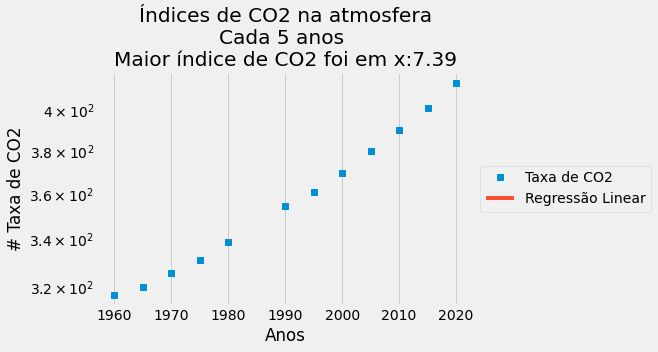

In [ ]:
co2_predicted = np.exp(B_) * np.exp(A_ * x_)
#transistor_Moores_law = Moores_law(x)
plt.style.use("fivethirtyeight")
plt.semilogy(x_, ye, "s", label="Taxa de CO2")
plt.semilogy(x_, co2_predicted, label="Regressão Linear")


#plt.plot(x, transistor_Moores_law, label="Predição de CO2")
plt.title(
    "Índices de CO2 na atmosfera\n"
    + "Cada 5 anos \n"
    + "Maior índice de CO2 foi em x:{:.2f}".format(np.exp(A_ * 2))
)
plt.xlabel("Anos")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.ylabel("# Taxa de CO2")

In [ ]:
'''
CO2_count2020 = y[x_ == 2020]
print(
    CO2_count2020.max(), CO2_count2020.min(), CO2_count2020.mean()
)
Y = np.linspace(1960.5, 2020.5)
your_model2020 = np.exp(B) * np.exp(A * y)
#Moore_Model2020 = Moores_law(y)

plt.plot(
    2020 * np.ones(np.sum(x == 2020)),
    CO2_count2020,
    "ro",
    label="2020",
    alpha=0.2,
)
plt.plot(2017, CO2_count2020.mean(), "g+", markersize=20, mew=6)

plt.plot(Y, your_model2020, label="Your prediction")
#plt.plot(Y, Moore_Model2017, label="Moores law")
plt.ylabel("# of transistors\nper microprocessor")
plt.legend()
'''

'\nCO2_count2020 = y[x_ == 2020]\nprint(\n    CO2_count2020.max(), CO2_count2020.min(), CO2_count2020.mean()\n)\nY = np.linspace(1960.5, 2020.5)\nyour_model2020 = np.exp(B) * np.exp(A * y)\n#Moore_Model2020 = Moores_law(y)\n\nplt.plot(\n    2020 * np.ones(np.sum(x == 2020)),\n    CO2_count2020,\n    "ro",\n    label="2020",\n    alpha=0.2,\n)\nplt.plot(2017, CO2_count2020.mean(), "g+", markersize=20, mew=6)\n\nplt.plot(Y, your_model2020, label="Your prediction")\n#plt.plot(Y, Moore_Model2017, label="Moores law")\nplt.ylabel("# of transistors\nper microprocessor")\nplt.legend()\n'

##Teste inválidos

###Redefinindo as variáveis!!!

In [ ]:
#from pandas.core.arrays.sparse import array

#   Valor de 'n'
n_ = np.size(x)

#   Somatótios de 'x'
s_xl = sum(x_l)
s_xp = sum(x_p)
s_xe = sum(x_e)

#   Somatório de 'y'
s_y = sum(y)

#   Somatórios de 'xy'
s_xly = s_xl * s_y
s_xpy = s_xp * s_y
s_xey = s_xe * s_y

#   Somatórios de 'x²'
s_xl2 = np.square(s_xl)
s_xp2 = np.square(s_xp)
s_xe2 = np.square(s_xe)

print("Valor de 'n': {} \nSomatório de Logarítimo de 'x': {} \nSomatório de 'x' na 2ª Potência: {} \nSomatório de Exponencial de 'x': {} \nSomatório de 'y': {} \nSomatório de Logarítimo de 'xy': {} \nSomatório de 'xy' na 2ª Potência: {} \nSomatório de Exponencial de 'xy': {} \nSomatório de Logarítimo de 'x²': {} \nSomatório de 'x²' na 2ª Potência: {} \nSomatório de Exponencial de 'x²': {}".format(n_, x_l, x_p, x_e, s_y, s_xly, s_xpy, s_xey, s_xl2, s_xp2, s_xe2) )

Valor de 'n': 12 
Somatório de Logarítimo de 'x': [7.58069975 7.58324752 7.58578882 7.58832368 7.59085212 7.59588992
 7.59839933 7.60090246 7.60339934 7.60589    7.60837447 7.61085279] 
Somatório de 'x' na 2ª Potência: 0      3.834891e+06
1      3.835213e+06
2      3.835545e+06
3      3.835867e+06
4      3.836200e+06
           ...     
770    4.090338e+06
771    4.090675e+06
772    4.091012e+06
773    4.091349e+06
774    4.091686e+06
Name: Dados decimais, Length: 775, dtype: float64 
Somatório de Exponencial de 'x': 0      inf
1      inf
2      inf
3      inf
4      inf
      ... 
770    inf
771    inf
772    inf
773    inf
774    inf
Name: Dados decimais, Length: 775, dtype: float64 
Somatório de 'y': 4302.9707 
Somatório de Logarítimo de 'xy': 392227.0539980463 
Somatório de 'xy' na 2ª Potência: 13214491720375.637 
Somatório de Exponencial de 'xy': inf 
Somatório de Logarítimo de 'x²': 8308.80017141069 
Somatório de 'x²' na 2ª Potência: 9.43113906263534e+18 
Somatório de Exponencial

###Aplicando a equação D!!!

D) a = (nΣxy - ΣxΣy) / nΣx² - (Σx)²

In [ ]:
#   Com Logarítmo de 'x'
a_l = (s_xly - (s_xl * s_y)) / (n_ * s_xl2) - np.square(s_xl)
a_l

-34656667.33839759

In [ ]:
#   Com 'x' elevado a 2ª Potência
a_p = (s_xpy - (s_xp * s_y)) / (n_ * s_xp2) - np.square(s_xp)
a_p

-9.43113906263534e+18

In [ ]:
#   Com Exponencial de 'x'
a_e = (s_xey - (s_xe * s_y)) / (n_ * s_xe2) - np.square(s_xe)
a_e

nan

###Aplicando a equação F!!!

F) b = (ΣxΣxy - ΣyΣx²) / (Σx)² - nΣx²

In [ ]:
#   Com Logarítmo de 'x'
b_l = ((s_xl * s_xly) - (s_y * s_xl2)) / s_xl2 - (n_ * s_xl2)
b_l

-26858917187.258133

In [ ]:
#   Com 'x' elevado a 2ª Potência
b_p = ((s_xp * s_xpy) - (s_y * s_xp2)) / s_xp2 - (n_ * s_xp2)
b_p

-7.309132773542388e+21

In [ ]:
#   Com Exponencial de 'x'
b_e = ((s_xe * s_xey) - (s_y * s_xe2)) / s_xe2 - (n_ * s_xe2)
b_e

nan